## Лабораторная работа №3.6 Наивный байесовский классификатор

### Загрузка датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

df = pd.DataFrame(dataset.data[:,:2], columns=dataset.feature_names[:2])
df['target'] = dataset.target
df['target'].value_counts()

,count
target,
1,357
0,212


### Гистограмма распределения и гистограмма признаков

<Axes: xlabel='mean radius', ylabel='mean texture'>

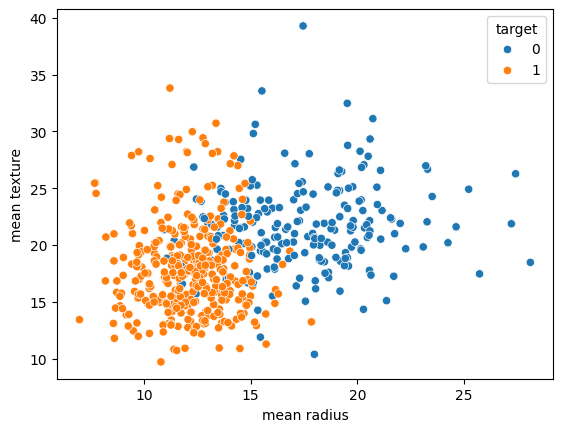

In [2]:
sns.scatterplot(x=df['mean radius'], y=df['mean texture'], hue=df['target'])

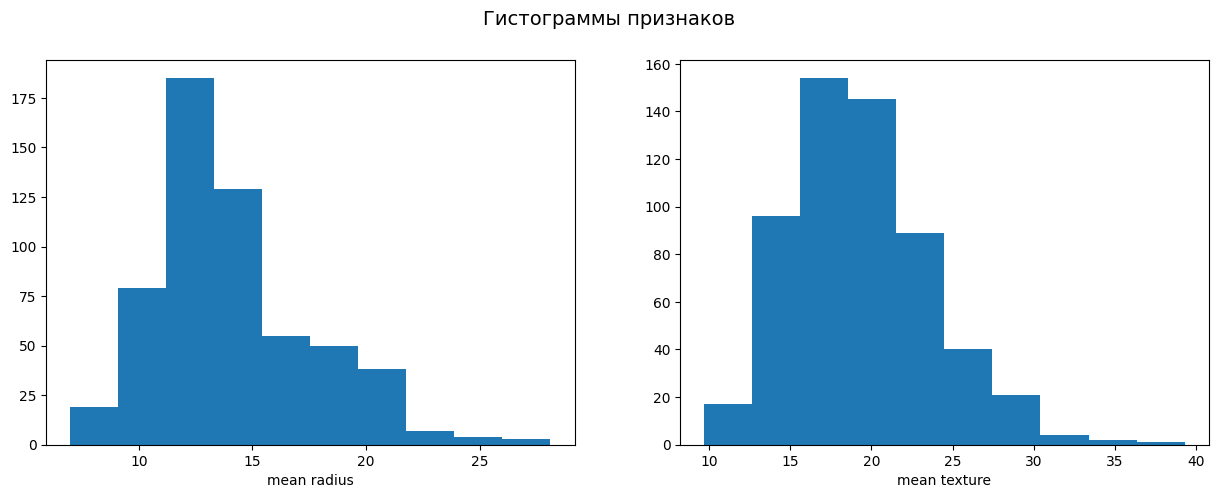

In [3]:
X = dataset.data[:,:2]
y = dataset.target

plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(dataset.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

### Модель наивного байесовского классификатора

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)

y_pred_bayes = gaussian_nb.predict(X)

print(confusion_matrix(y, y_pred_bayes))
print('точность: ', accuracy_score(y, y_pred_bayes))
print('f1 score: ', f1_score(y, y_pred_bayes))

[[164  48]
 [ 17 340]]
точность:  0.8857644991212654
f1 score:  0.912751677852349


### Модель наивного байесовского классификатора на полном датасете

In [9]:
X = dataset.data
y = dataset.target

gaussian_nb.fit(X, y)

y_pred_bayes_all = gaussian_nb.predict(X)

print(confusion_matrix(y, y_pred_bayes_all))
print('точность= ', accuracy_score(y, y_pred_bayes_all))
print('f1 score= ', f1_score(y, y_pred_bayes_all))

[[189  23]
 [ 10 347]]
точность=  0.9420035149384886
f1 score=  0.9546079779917469


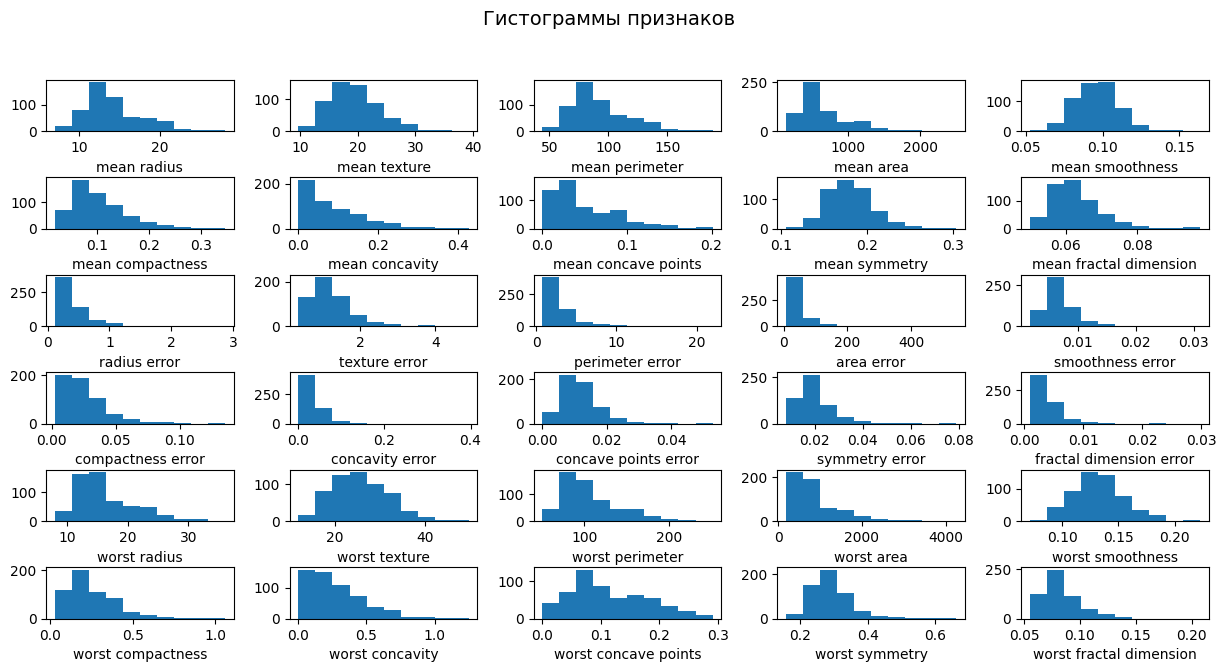

In [10]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])

    plt.xlabel(dataset.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

### Модель наивного байесовского классификатора на отобранных признаках

In [11]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df = df.drop(['mean concavity','radius error',
              'perimeter error', 'area error',
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area',
              'worst concavity'],
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678,0


In [12]:
X = df.drop('target', axis=1)
y = df['target']

gaussian_nb.fit(X, y)

y_pred = gaussian_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('точность= ', accuracy_score(y, y_pred))
print('f1 score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
точность=  0.945518453427065
f1 score=  0.9566433566433566


## Задания для самостоятельного выполнения

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score

def evaluate_naive_bayes_classifiers(input_features: pd.DataFrame, target_labels: pd.Series):
    features_train, features_test, labels_train, labels_test = train_test_split(input_features, target_labels, test_size=0.2, random_state=42)

    classifiers = {
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
        "CategoricalNB": CategoricalNB(),
        "ComplementNB": ComplementNB()
    }

    for classifier_name, classifier in classifiers.items():
        try:
            classifier.fit(features_train, labels_train)
            predictions = classifier.predict(features_test)
            accuracy = accuracy_score(labels_test, predictions)
            f1 = f1_score(labels_test, predictions)
            print(f"{classifier_name} Accuracy: {accuracy}")
            print(f"{classifier_name} F1 score: {f1}\n")
        except Exception as error:
            print(f"{classifier_name} не применим: {error}")

evaluate_naive_bayes_classifiers(input_features=X, target_labels=y)

MultinomialNB Accuracy: 0.868421052631579
MultinomialNB F1 score: 0.8951048951048951

BernoulliNB Accuracy: 0.6228070175438597
BernoulliNB F1 score: 0.7675675675675676

CategoricalNB не применим: index 1 is out of bounds for axis 1 with size 1
ComplementNB Accuracy: 0.868421052631579
ComplementNB F1 score: 0.8951048951048951



In [31]:
from pathlib import Path

titanic_dataset = pd.read_csv(Path('drive/MyDrive/Colab Notebooks/AI/Лабораторная работа 3/data/titanic.csv'))

titanic_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [32]:
titanic_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_C   891 non-null    int64  
 9   Embarked_Q   891 non-null    int64  
 10  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [33]:
titanic_dataset.drop(columns=["SibSp", "Parch", "Fare"], inplace=True)


X = titanic_dataset.drop(columns=["Survived"])
y = titanic_dataset["Survived"]

evaluate_naive_bayes_classifiers(X, y)

MultinomialNB Accuracy: 0.6312849162011173
MultinomialNB F1 score: 0.5285714285714286

BernoulliNB Accuracy: 0.7821229050279329
BernoulliNB F1 score: 0.7272727272727273

CategoricalNB Accuracy: 0.776536312849162
CategoricalNB F1 score: 0.7435897435897436

ComplementNB Accuracy: 0.6368715083798883
ComplementNB F1 score: 0.5911949685534591



In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
